# Problem Statement
A retail company “ABC Private Limited” wants to understand the customer purchase behaviour (specifically, purchase amount) against various products of different categories. They have shared purchase summary of various customers for selected high volume products from last month. The data set also contains customer demographics (age, gender, marital status, city_type, stay_in_current_city), product details (product_id and product category) and Total purchase_amount from last month.

Now, they want to build a model to predict the purchase amount of customer against various products which will help them to create personalized offer for customers against different products.


* Data
* Variable  Definition
* User_ID   User ID
* Product_ID    Product ID
* Gender    Sex of User
* Age   Age in bins
* Occupation    Occupation (Masked)
* City_Category Category of the City (A,B,C)
* Stay_In_Current_City_Years    Number of years stay in current city
* Marital_Status    Marital Status
* Product_Category_1    Product Category (Masked)
* Product_Category_2    Product may belongs to other category also (Masked)
* Product_Category_3    Product may belongs to other category also (Masked)
* Purchase  Purchase Amount (Target Variable)


In [553]:
## Importing the library
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

In [434]:
## loading the dataset into pandas 
df=pd.read_csv("https://raw.githubusercontent.com/nanthasnk/Black-Friday-Sales-Prediction/master/Data/BlackFridaySales.csv")

In [435]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [436]:
df.size

6600816

In [437]:
df.shape

(550068, 12)

In [438]:
##memory uses by each coulmns
df.memory_usage()

Index                             128
User_ID                       4400544
Product_ID                    4400544
Gender                        4400544
Age                           4400544
Occupation                    4400544
City_Category                 4400544
Stay_In_Current_City_Years    4400544
Marital_Status                4400544
Product_Category_1            4400544
Product_Category_2            4400544
Product_Category_3            4400544
Purchase                      4400544
dtype: int64

In [439]:
df1=df.head(10000)

In [440]:
### memory consumption 
df1.memory_usage()

Index                           128
User_ID                       80000
Product_ID                    80000
Gender                        80000
Age                           80000
Occupation                    80000
City_Category                 80000
Stay_In_Current_City_Years    80000
Marital_Status                80000
Product_Category_1            80000
Product_Category_2            80000
Product_Category_3            80000
Purchase                      80000
dtype: int64

In [441]:
df1.shape

(10000, 12)

In [442]:
###findig the data types 
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   User_ID                     10000 non-null  int64  
 1   Product_ID                  10000 non-null  object 
 2   Gender                      10000 non-null  object 
 3   Age                         10000 non-null  object 
 4   Occupation                  10000 non-null  int64  
 5   City_Category               10000 non-null  object 
 6   Stay_In_Current_City_Years  10000 non-null  object 
 7   Marital_Status              10000 non-null  int64  
 8   Product_Category_1          10000 non-null  int64  
 9   Product_Category_2          6757 non-null   float64
 10  Product_Category_3          2997 non-null   float64
 11  Purchase                    10000 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 937.6+ KB


In [443]:
## number of missing value each columns 
df1.isnull().sum()

User_ID                          0
Product_ID                       0
Gender                           0
Age                              0
Occupation                       0
City_Category                    0
Stay_In_Current_City_Years       0
Marital_Status                   0
Product_Category_1               0
Product_Category_2            3243
Product_Category_3            7003
Purchase                         0
dtype: int64

In [444]:
## percentage of missing values 
df1.isnull().sum()*100/len(df)

User_ID                       0.000000
Product_ID                    0.000000
Gender                        0.000000
Age                           0.000000
Occupation                    0.000000
City_Category                 0.000000
Stay_In_Current_City_Years    0.000000
Marital_Status                0.000000
Product_Category_1            0.000000
Product_Category_2            0.589563
Product_Category_3            1.273115
Purchase                      0.000000
dtype: float64

In [445]:
###Duplicate row in the df1 dataset 
df1.duplicated().sum()

0

In [446]:
## basic stat of the data
df1.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,1.000000e+04,10000.000000,10000.000000,10000.000000,6757.000000,2997.000000,10000.000000
mean,1.000791e+06,8.433700,0.405300,5.292800,9.796359,12.811144,9152.487700
std,4.402229e+02,6.660333,0.490975,3.660739,5.055550,4.057049,4881.543001
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,186.000000
25%,1.000403e+06,3.000000,0.000000,2.000000,5.000000,9.000000,5831.750000
50%,1.000817e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8021.500000
75%,1.001172e+06,15.000000,1.000000,8.000000,14.000000,16.000000,11922.250000
max,1.001530e+06,20.000000,1.000000,18.000000,18.000000,18.000000,23958.000000


In [447]:
## renaming the Product name 
df1.rename(columns={"Product_Category_1":"CATG1","Product_Category_2":"CATG2","Product_Category_3":"CATG3"}, inplace=True)
df1

C:\Users\prash\AppData\Local\Temp\ipykernel_14052\3266410032.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.rename(columns={"Product_Category_1":"CATG1","Product_Category_2":"CATG2","Product_Category_3":"CATG3"}, inplace=True)


,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,CATG1,CATG2,CATG3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1001530,P00151742,M,26-35,4,A,1,1,8,15.0,16.0,7967
9996,1001530,P00119742,M,26-35,4,A,1,1,5,8.0,12.0,8590
9997,1001530,P00178842,M,26-35,4,A,1,1,2,4.0,9.0,13147
9998,1001530,P00124842,M,26-35,4,A,1,1,11,NaN,NaN,5975


In [448]:
###catagorical columns
catagorical_values=df1.select_dtypes(include=['object'])
catagorical_values

,Product_ID,Gender,Age,City_Category,Stay_In_Current_City_Years
0,P00069042,F,0-17,A,2
1,P00248942,F,0-17,A,2
2,P00087842,F,0-17,A,2
3,P00085442,F,0-17,A,2
4,P00285442,M,55+,C,4+
...,...,...,...,...,...
9995,P00151742,M,26-35,A,1
9996,P00119742,M,26-35,A,1
9997,P00178842,M,26-35,A,1
9998,P00124842,M,26-35,A,1


In [449]:
###Non catagorical columns
numerical_variable =df1.select_dtypes(include=['int','float'])
numerical_variable

,User_ID,Occupation,Marital_Status,CATG1,CATG2,CATG3,Purchase
0,1000001,10,0,3,NaN,NaN,8370
1,1000001,10,0,1,6.0,14.0,15200
2,1000001,10,0,12,NaN,NaN,1422
3,1000001,10,0,12,14.0,NaN,1057
4,1000002,16,0,8,NaN,NaN,7969
...,...,...,...,...,...,...,...
9995,1001530,4,1,8,15.0,16.0,7967
9996,1001530,4,1,5,8.0,12.0,8590
9997,1001530,4,1,2,4.0,9.0,13147
9998,1001530,4,1,11,NaN,NaN,5975


In [450]:
## Finding the Unique values in Age 
df1["Age"].unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

In [451]:
##converting the Age catagorical variable into numerical by dummies 
df1["Age"]=df1["Age"].map({"0-17":17,"18-25":20,"26-35":30,"36-45":45,"46-50":50,"51-55":55,"55+":60})

C:\Users\prash\AppData\Local\Temp\ipykernel_14052\29233581.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["Age"]=df1["Age"].map({"0-17":17,"18-25":20,"26-35":30,"36-45":45,"46-50":50,"51-55":55,"55+":60})


In [452]:
##converting the gender catagorical variable into numerical by dummies 
df1["Gender"]=df1["Gender"].map({"M":1,"F":0})

C:\Users\prash\AppData\Local\Temp\ipykernel_14052\1427848451.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["Gender"]=df1["Gender"].map({"M":1,"F":0})


In [453]:
###checking the unique value of the City_category 
df1["City_Category"].unique()

array(['A', 'C', 'B'], dtype=object)

In [454]:
### Replacing the categorical values to numerical 
df1["City_Category"]=df1["City_Category"].map({'A':1,'B':2,'C':3})

C:\Users\prash\AppData\Local\Temp\ipykernel_14052\4182879475.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["City_Category"]=df1["City_Category"].map({'A':1,'B':2,'C':3})


# rechaking the Catagorical variable 

In [455]:
###catagorical columns
catagorical_values=df1.select_dtypes(include=['object'])
catagorical_values

,Product_ID,Stay_In_Current_City_Years
0,P00069042,2
1,P00248942,2
2,P00087842,2
3,P00085442,2
4,P00285442,4+
...,...,...
9995,P00151742,1
9996,P00119742,1
9997,P00178842,1
9998,P00124842,1


## Droping the unnecessary Columns

In [456]:
df1.drop("Stay_In_Current_City_Years",axis=1,inplace=True)

C:\Users\prash\AppData\Local\Temp\ipykernel_14052\3455787369.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.drop("Stay_In_Current_City_Years",axis=1,inplace=True)


In [457]:
df1.drop("User_ID",axis=1,inplace=True)

C:\Users\prash\AppData\Local\Temp\ipykernel_14052\1830955441.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.drop("User_ID",axis=1,inplace=True)


# Rechecking the df1 data set

In [458]:
df1

,Product_ID,Gender,Age,Occupation,City_Category,Marital_Status,CATG1,CATG2,CATG3,Purchase
0,P00069042,0,17,10,1,0,3,NaN,NaN,8370
1,P00248942,0,17,10,1,0,1,6.0,14.0,15200
2,P00087842,0,17,10,1,0,12,NaN,NaN,1422
3,P00085442,0,17,10,1,0,12,14.0,NaN,1057
4,P00285442,1,60,16,3,0,8,NaN,NaN,7969
...,...,...,...,...,...,...,...,...,...,...
9995,P00151742,1,30,4,1,1,8,15.0,16.0,7967
9996,P00119742,1,30,4,1,1,5,8.0,12.0,8590
9997,P00178842,1,30,4,1,1,2,4.0,9.0,13147
9998,P00124842,1,30,4,1,1,11,NaN,NaN,5975


In [459]:
###Rechecking the data types after converting into numerical 
df1.dtypes

Product_ID         object
Gender              int64
Age                 int64
Occupation          int64
City_Category       int64
Marital_Status      int64
CATG1               int64
CATG2             float64
CATG3             float64
Purchase            int64
dtype: object

In [460]:
### standard deviation of the data
import math

def variance (data,ddof=1):
    n=len(df1)
    mean=sum(data)/n
    variances=sum((x-mean)**2 for x in data)/(n-ddof)
    return variances
def sd(data):
    var=variance(data)
    standard_deviation=math.sqrt(var)
    return standard_deviation
sd(df1["CATG1"])

3.6607387588881912

In [461]:
#Number of columns with zero standard deviation and their list
zero_standard_deviation=df1.describe()
zero_standard_deviation

,Gender,Age,Occupation,City_Category,Marital_Status,CATG1,CATG2,CATG3,Purchase
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,6757.000000,2997.000000,10000.000000
mean,0.763600,34.536100,8.433700,1.959700,0.405300,5.292800,9.796359,12.811144,9152.487700
std,0.424892,12.392936,6.660333,0.792047,0.490975,3.660739,5.055550,4.057049,4881.543001
min,0.000000,17.000000,0.000000,1.000000,0.000000,1.000000,2.000000,3.000000,186.000000
25%,1.000000,30.000000,3.000000,1.000000,0.000000,2.000000,5.000000,9.000000,5831.750000
50%,1.000000,30.000000,7.000000,2.000000,0.000000,5.000000,9.000000,14.000000,8021.500000
75%,1.000000,45.000000,15.000000,3.000000,1.000000,8.000000,14.000000,16.000000,11922.250000
max,1.000000,60.000000,20.000000,3.000000,1.000000,18.000000,18.000000,18.000000,23958.000000


# Non of the columns has zero standard deviation 

In [462]:
###Number of unique value is 
df1["Purchase"].unique()

array([ 8370, 15200,  1422, ..., 20138,  8590, 13147], dtype=int64)

In [463]:
df1["Purchase"].nunique()

5876

In [464]:
df1["CATG1"].unique()

array([ 3,  1, 12,  8,  5,  4,  2,  6, 14, 11, 13, 15,  7, 16, 18, 10, 17,
        9], dtype=int64)

In [465]:
df1["CATG1"].nunique()

18

In [466]:
df1["CATG2"].unique()

array([nan,  6., 14.,  2.,  8., 15., 16., 11.,  5.,  3.,  4., 12.,  9.,
       10., 17., 13.,  7., 18.])

In [467]:
df1["CATG2"].nunique()

17

In [468]:
df1["CATG2"].value_counts()

8.0     1196
14.0    1024
2.0      868
16.0     752
15.0     656
4.0      468
5.0      462
6.0      321
17.0     241
11.0     239
13.0     184
9.0      110
12.0      84
10.0      50
3.0       49
18.0      40
7.0       13
Name: CATG2, dtype: int64

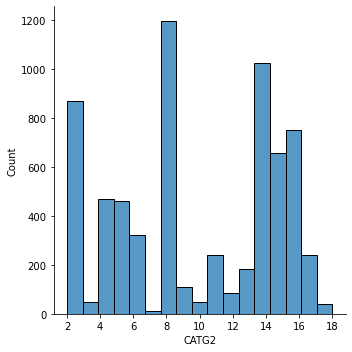

In [469]:
sns.displot(df1["CATG2"])

In [470]:
df1["CATG3"].unique()

array([nan, 14., 17.,  5.,  4., 16., 15.,  8.,  9., 13.,  6., 12.,  3.,
       18., 11., 10.])

In [471]:
df1["CATG3"].nunique()


15

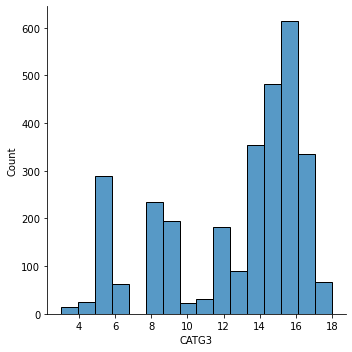

In [472]:
sns.displot(df1["CATG3"])

# OLS Ordinary Least Squares Regression

In [473]:
import statsmodels.api as sm

In [474]:
##OLS Ordinary Least Squares Regression (OLS)

CAT1=df1["CATG1"]
Price=df1.iloc[:,-1]

In [475]:
CAT1 = sm.add_constant(CAT1)

In [476]:
model = sm.OLS(Price, CAT1).fit()
summary = model.summary()
print(summary)

                            OLS Regression Results                            
Dep. Variable:               Purchase   R-squared:                       0.102
Model:                            OLS   Adj. R-squared:                  0.102
Method:                 Least Squares   F-statistic:                     1135.
Date:                Wed, 01 Jun 2022   Prob (F-statistic):          8.89e-236
Time:                        02:45:22   Log-Likelihood:                -98583.
No. Observations:               10000   AIC:                         1.972e+05
Df Residuals:                    9998   BIC:                         1.972e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.141e+04     81.330    140.243      0.0

In [477]:
##OLS Ordinary Least Squares Regression  of Gender 

Gender=df1["Gender"]
Price=df1.iloc[:,-1]
Gender = sm.add_constant(Gender)
model = sm.OLS(Price, Gender).fit()
summary = model.summary()
print(summary)

                            OLS Regression Results                            
Dep. Variable:               Purchase   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                  0.005
Method:                 Least Squares   F-statistic:                     47.35
Date:                Wed, 01 Jun 2022   Prob (F-statistic):           6.30e-12
Time:                        02:45:22   Log-Likelihood:                -99097.
No. Observations:               10000   AIC:                         1.982e+05
Df Residuals:                    9998   BIC:                         1.982e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       8550.1954    100.168     85.359      0.0

In [478]:
##OLS Ordinary Least Squares Regression  of Age

Age=df1["Age"]
Price=df1.iloc[:,-1]
Age = sm.add_constant(Age)
model = sm.OLS(Price, Age).fit()
summary = model.summary()
print(summary)

                            OLS Regression Results                            
Dep. Variable:               Purchase   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.2717
Date:                Wed, 01 Jun 2022   Prob (F-statistic):              0.602
Time:                        02:45:23   Log-Likelihood:                -99121.
No. Observations:               10000   AIC:                         1.982e+05
Df Residuals:                    9998   BIC:                         1.983e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       9081.5769    144.542     62.830      0.0

In [479]:
##OLS for Occupation

Occupation=df1["Occupation"]
Occupation=sm.add_constant(Occupation)
model=sm.OLS(Price,Occupation).fit()
summary=model.summary()
print(summary)

                            OLS Regression Results                            
Dep. Variable:               Purchase   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                   0.09123
Date:                Wed, 01 Jun 2022   Prob (F-statistic):              0.763
Time:                        02:45:23   Log-Likelihood:                -99121.
No. Observations:               10000   AIC:                         1.982e+05
Df Residuals:                    9998   BIC:                         1.983e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       9133.8154     78.770    115.955      0.0

In [480]:
## Correlation 
df1.corr()

,Gender,Age,Occupation,City_Category,Marital_Status,CATG1,CATG2,CATG3,Purchase
Gender,1.000000,-0.002026,0.132995,-0.014939,0.021635,-0.054706,-0.013345,0.042230,0.068653
Age,-0.002026,1.000000,0.127853,0.120859,0.337116,0.068301,0.065410,0.030808,0.005213
Occupation,0.132995,0.127853,1.000000,0.042955,-0.020515,-0.002038,-0.000162,-0.002537,0.003021
City_Category,-0.014939,0.120859,0.042955,1.000000,0.022975,-0.041322,-0.025907,-0.019790,0.086020
Marital_Status,0.021635,0.337116,-0.020515,0.022975,1.000000,0.013426,0.016601,-0.007925,-0.000742
CATG1,-0.054706,0.068301,-0.002038,-0.041322,0.013426,1.000000,0.542762,0.219062,-0.319295
CATG2,-0.013345,0.065410,-0.000162,-0.025907,0.016601,0.542762,1.000000,0.549823,-0.212044
CATG3,0.042230,0.030808,-0.002537,-0.019790,-0.007925,0.219062,0.549823,1.000000,-0.027387
Purchase,0.068653,0.005213,0.003021,0.086020,-0.000742,-0.319295,-0.212044,-0.027387,1.000000


In [481]:
#VIF variance_inflation_factor

from statsmodels.stats.outliers_influence import variance_inflation_factor


In [482]:
x = df1[['Gender', 'Age', 'CATG1','Purchase']]
  
x1=numerical_variable

In [483]:
type(x)

pandas.core.frame.DataFrame

In [484]:
# VIF dataframe
vif_data = pd.DataFrame()

vif_data 


""


In [485]:
vif_data["feature"] = x.columns

vif_data

,feature
0,Gender
1,Age
2,CATG1
3,Purchase


In [486]:
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(x.values, i) for i in range (len(x.columns))]
                           
print(vif_data)

    feature       VIF
0    Gender  3.575206
1       Age  5.638288
2     CATG1  2.727109
3  Purchase  3.660528


## VIF of each feature is very low hence multicolinearty is very low b/w each feature . 

In [487]:
df1

,Product_ID,Gender,Age,Occupation,City_Category,Marital_Status,CATG1,CATG2,CATG3,Purchase
0,P00069042,0,17,10,1,0,3,NaN,NaN,8370
1,P00248942,0,17,10,1,0,1,6.0,14.0,15200
2,P00087842,0,17,10,1,0,12,NaN,NaN,1422
3,P00085442,0,17,10,1,0,12,14.0,NaN,1057
4,P00285442,1,60,16,3,0,8,NaN,NaN,7969
...,...,...,...,...,...,...,...,...,...,...
9995,P00151742,1,30,4,1,1,8,15.0,16.0,7967
9996,P00119742,1,30,4,1,1,5,8.0,12.0,8590
9997,P00178842,1,30,4,1,1,2,4.0,9.0,13147
9998,P00124842,1,30,4,1,1,11,NaN,NaN,5975


array([[<AxesSubplot:title={'center':'Gender'}>,
        <AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Occupation'}>],
       [<AxesSubplot:title={'center':'City_Category'}>,
        <AxesSubplot:title={'center':'Marital_Status'}>,
        <AxesSubplot:title={'center':'CATG1'}>],
       [<AxesSubplot:title={'center':'CATG2'}>,
        <AxesSubplot:title={'center':'CATG3'}>,
        <AxesSubplot:title={'center':'Purchase'}>]], dtype=object)

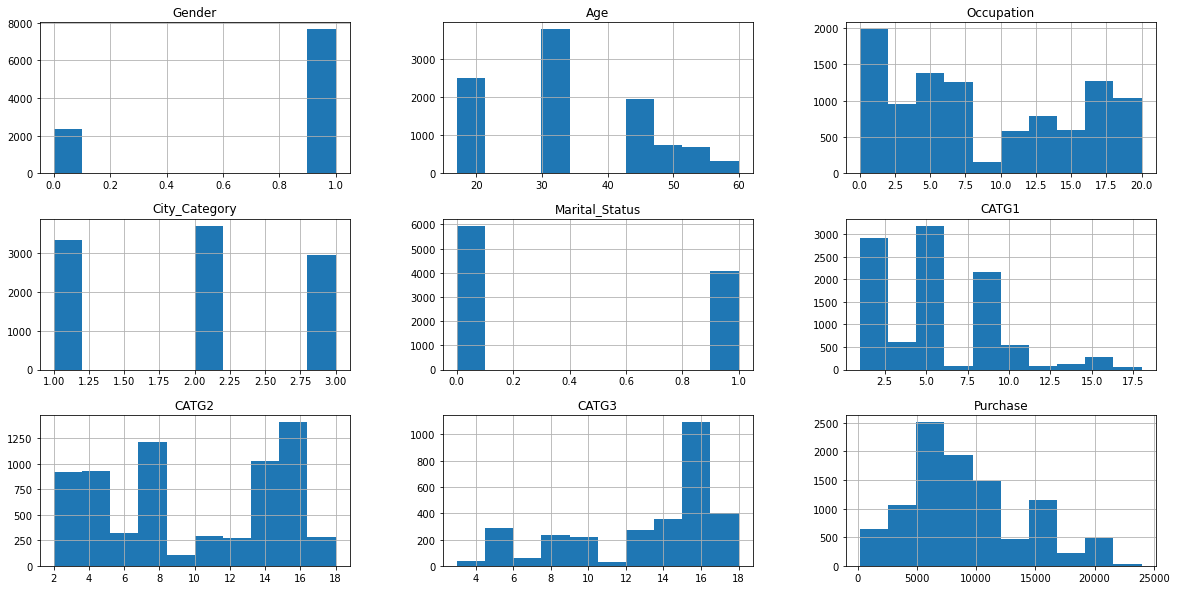

In [488]:
df1.hist(figsize=(20,10))

# checking the Outlier in purchase data

<AxesSubplot:xlabel='CATG1', ylabel='Purchase'>

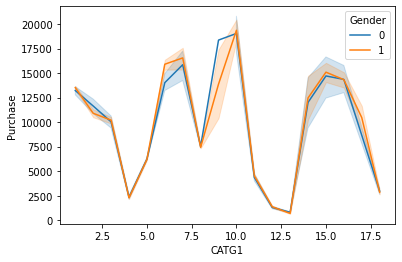

In [489]:
sns.lineplot(data=df1,x="CATG1",y="Purchase",hue="Gender")

<AxesSubplot:xlabel='CATG2', ylabel='Purchase'>

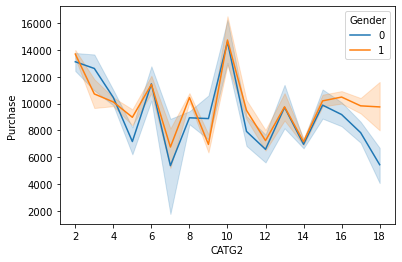

In [490]:
sns.lineplot(data=df1,x="CATG2",y="Purchase",hue="Gender")

<AxesSubplot:xlabel='CATG3', ylabel='Purchase'>

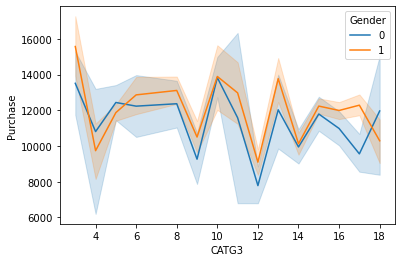

In [491]:
sns.lineplot(data=df1,x="CATG3",y="Purchase",hue="Gender")

<AxesSubplot:xlabel='Gender', ylabel='Purchase'>

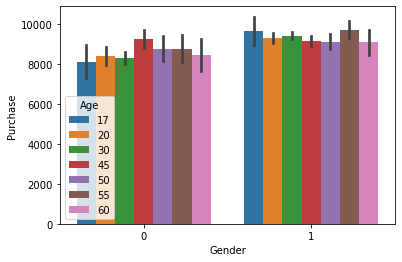

In [492]:
sns.barplot(data=df1,x='Gender',y="Purchase",hue="Age")

<AxesSubplot:xlabel='Gender', ylabel='Purchase'>

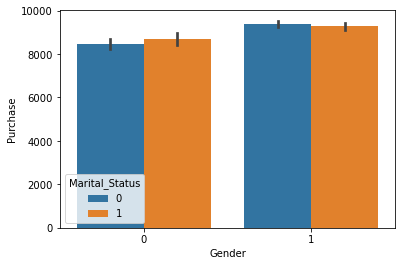

In [493]:
sns.barplot(data=df1,x='Gender',y="Purchase",hue="Marital_Status")

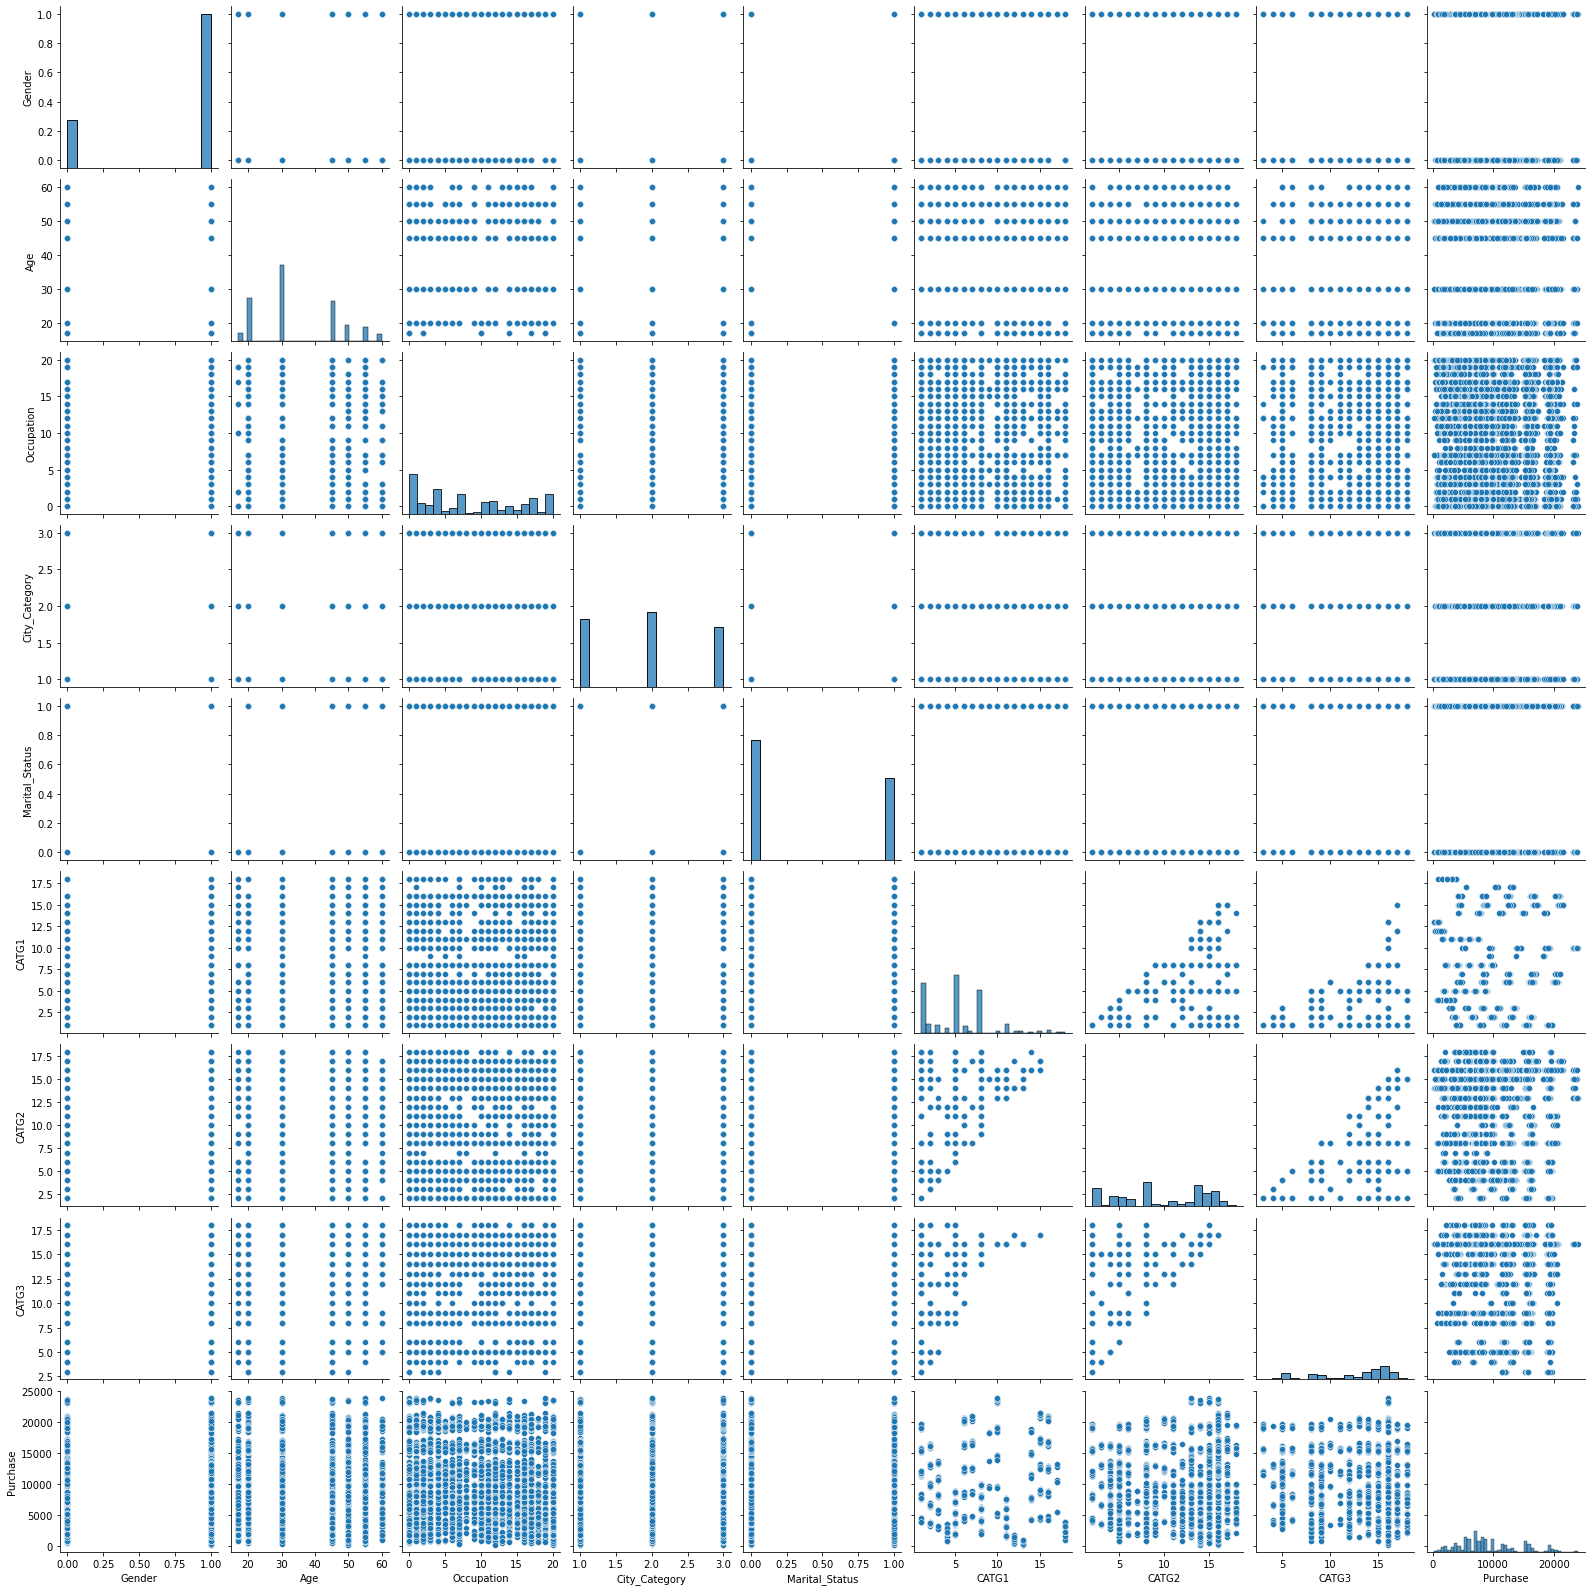

In [494]:
sns.pairplot(data=df1)

<AxesSubplot:xlabel='CATG1', ylabel='Purchase'>

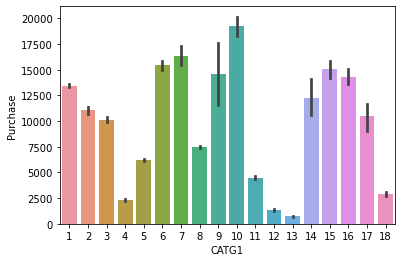

In [495]:

sns.barplot(x=df1["CATG1"],y=df1["Purchase"],)

<AxesSubplot:xlabel='CATG2', ylabel='Purchase'>

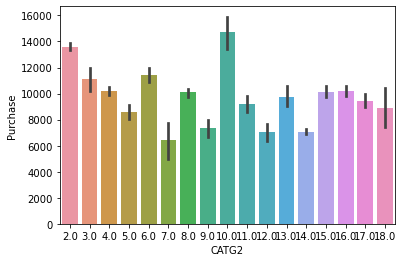

In [496]:
sns.barplot(x=df1["CATG2"],y=df1["Purchase"],)

<AxesSubplot:xlabel='CATG3', ylabel='Purchase'>

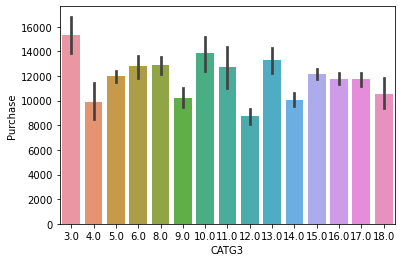

In [497]:
sns.barplot(x=df1["CATG3"],y=df1["Purchase"],)

C:\Users\prash\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Gender', ylabel='count'>

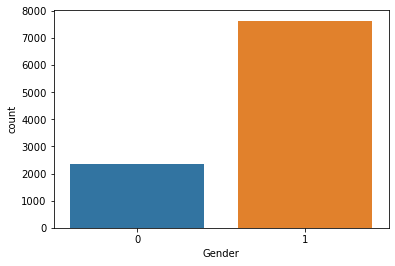

In [498]:
sns.countplot(df1["Gender"])

C:\Users\prash\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age', ylabel='count'>

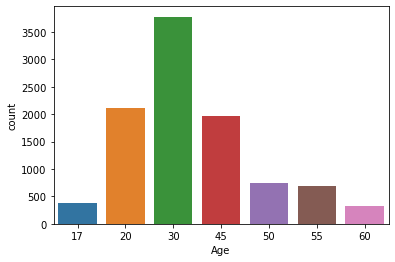

In [499]:
sns.countplot(df1["Age"])

<AxesSubplot:xlabel='Purchase', ylabel='Count'>

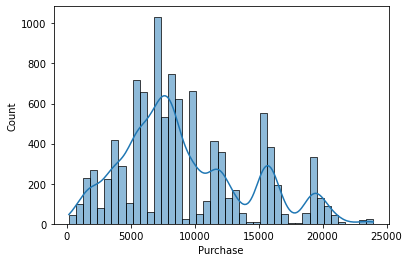

In [500]:
sns.histplot(df1['Purchase'],kde=True)

# Checking the outliers 

C:\Users\prash\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Purchase'>

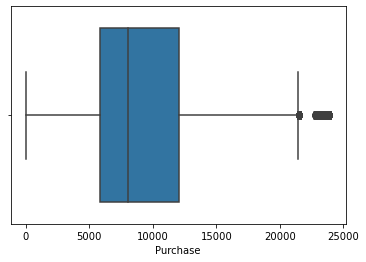

In [501]:
sns.boxplot(df["Purchase"])

# Removing the Outliers 

In [502]:
df1["Purchase"]=sorted(df1["Purchase"])

C:\Users\prash\AppData\Local\Temp\ipykernel_14052\3896991731.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["Purchase"]=sorted(df1["Purchase"])


In [503]:
q1,q3=np.percentile(df1["Purchase"],(25,75))
IQR=q3-q1
lower_fence=q1-(1.5*IQR)
upper_fence=q3+(1.5*IQR)

In [504]:
lower_fence

-3304.0

In [505]:
upper_fence

21058.0

In [506]:
df1.drop(df1["Purchase"][(df1["Purchase"]<lower_fence) | (df1["Purchase"]>upper_fence)].index , inplace=True)

C:\Users\prash\AppData\Local\Temp\ipykernel_14052\2081010292.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.drop(df1["Purchase"][(df1["Purchase"]<lower_fence) | (df1["Purchase"]>upper_fence)].index , inplace=True)


C:\Users\prash\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Purchase'>

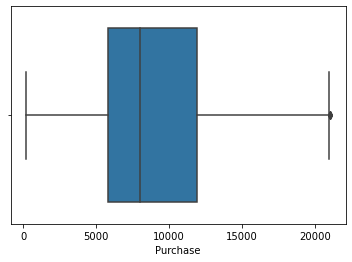

In [507]:
sns.boxplot(df1["Purchase"])

# Checking the outliers in the CATG1

C:\Users\prash\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='CATG1'>

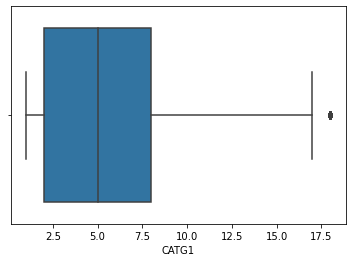

In [508]:
sns.boxplot(df1["CATG1"])

# Removing the outliers from CATG1

In [509]:
df1["CATG1"]=sorted(df1["CATG1"])
q1,q3=np.percentile(df1["CATG1"],(25,75))

C:\Users\prash\AppData\Local\Temp\ipykernel_14052\2295034592.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["CATG1"]=sorted(df1["CATG1"])


In [510]:
IQR=q3-q1
lower_fence=q1-(1.5*IQR)
upper_fence=q3+(1.5*IQR)

In [511]:
lower_fence

-7.0

In [512]:
upper_fence

17.0

In [513]:
###OUTLIERS Data points 
df1.drop(df1["CATG1"][(df1["CATG1"]<lower_fence)|(df1["CATG1"]>upper_fence)].index,inplace=True)

C:\Users\prash\AppData\Local\Temp\ipykernel_14052\2317036474.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.drop(df1["CATG1"][(df1["CATG1"]<lower_fence)|(df1["CATG1"]>upper_fence)].index,inplace=True)


C:\Users\prash\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='CATG1'>

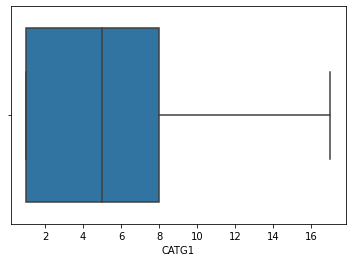

In [514]:
###After removing the data points 
sns.boxplot(df1["CATG1"])

# Checking the outliers in the CATG2

C:\Users\prash\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='CATG2'>

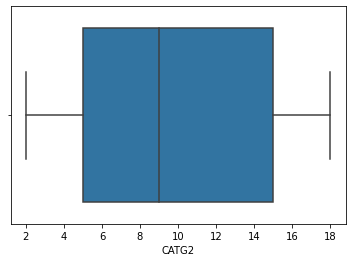

In [515]:
sns.boxplot(df1["CATG2"])

There is no outliers in the CATG2 

C:\Users\prash\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='CATG3'>

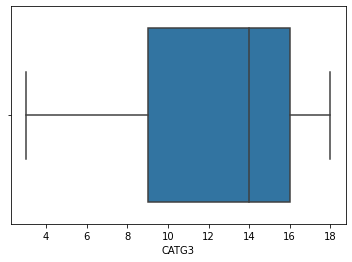

In [516]:
sns.boxplot(df1["CATG3"])

There is no outliers in the CATG3

In [517]:
df1.isnull().sum()

Product_ID           0
Gender               0
Age                  0
Occupation           0
City_Category        0
Marital_Status       0
CATG1                0
CATG2             3197
CATG3             6934
Purchase             0
dtype: int64

In [518]:
CATG2_mean=int(df1["CATG2"].mean())
CATG2_mean

9

### Replacing the Null values with mean of the CATG2

In [519]:
df1["CATG2"].fillna(value=CATG2_mean,inplace=True)

C:\Users\prash\AppData\Local\Temp\ipykernel_14052\1022520128.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["CATG2"].fillna(value=CATG2_mean,inplace=True)


In [520]:
df1["CATG2"].mode()

0    9.0
Name: CATG2, dtype: float64

In [521]:
df1["CATG2"].median()

9.0

### Null Value replacemant of CATG3

In [524]:
CATG3_mean=int(df1["CATG3"].mean())
CATG3_mean

12

In [525]:
df1["CATG3"].mode()

0    16.0
Name: CATG3, dtype: float64

In [527]:
df1["CATG3"].median()

14.0

In [528]:
df1["CATG3"].fillna(value=CATG3_mean,inplace=True)

C:\Users\prash\AppData\Local\Temp\ipykernel_14052\149580768.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["CATG3"].fillna(value=CATG3_mean,inplace=True)


In [530]:
## Rechecking the Null value 
df1.isnull().sum()

Product_ID        0
Gender            0
Age               0
Occupation        0
City_Category     0
Marital_Status    0
CATG1             0
CATG2             0
CATG3             0
Purchase          0
dtype: int64

### All null Value hs been replaced 

# Spliting the data into Independent and Dependent Variable 

In [546]:
X=df1.iloc[:,:-1]
Y=df1.iloc[:,-1]

# Spliting the data into Test and Train 

In [548]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_test,Y_train= train_test_split(X,Y,test_size=0.33,random_state=36)

In [542]:
X_train

,Product_ID,Gender,Age,Occupation,City_Category,Marital_Status,CATG1,CATG2,CATG3
136,P00346642,1,30,7,2,1,1,9.0,12.0
4647,P00128942,1,17,10,3,0,5,11.0,12.0
7029,P00268442,1,20,14,2,0,8,17.0,12.0
439,P00250842,1,20,4,3,0,1,9.0,12.0
3776,P00216042,1,30,1,2,0,5,8.0,12.0
...,...,...,...,...,...,...,...,...,...
9466,P00101742,0,30,3,1,0,12,14.0,12.0
7329,P00276142,0,30,20,1,0,8,9.0,12.0
2984,P00100842,1,30,14,1,1,3,9.0,12.0
9118,P00116142,1,50,3,3,1,11,13.0,16.0


In [543]:
X_test

,Product_ID,Gender,Age,Occupation,City_Category,Marital_Status,CATG1,CATG2,CATG3
3634,P00114142,0,30,11,2,0,5,9.0,12.0
3141,P00085242,0,30,14,1,0,3,14.0,17.0
2006,P00338542,1,45,6,3,0,1,9.0,12.0
4967,P00139942,1,30,17,3,0,5,9.0,12.0
4634,P00102842,0,30,3,1,0,5,9.0,12.0
...,...,...,...,...,...,...,...,...,...
940,P00005042,1,20,16,1,0,1,16.0,12.0
1533,P00001242,1,45,16,2,0,1,11.0,12.0
3587,P00110942,0,30,0,2,0,5,2.0,12.0
3457,P00052542,1,45,20,1,1,4,9.0,12.0


In [544]:
Y_test

136      1060
4647     7884
7029    11438
439      1960
3776     7047
        ...  
9466    19181
7329    11750
2984     6125
9118    16388
610      2263
Name: Purchase, Length: 6633, dtype: int64

In [550]:
Y_train

3634    7000
3141    6447
2006    5275
4967    8009
4634    7879
        ... 
940     3502
1533    4369
3587    6981
3457    6936
2027    5284
Name: Purchase, Length: 3267, dtype: int64